In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [ ]:
df = pd.read_csv("titanic.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
import pandas as pd
from google.colab import files

print("If file is local → Upload now")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

df = pd.read_csv(filename)
print("Dataset Shape:", df.shape)
df.head()


If file is local → Upload now


Saving titanic.csv to titanic (1).csv
Loaded file: titanic (1).csv
Dataset Shape: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df = df.copy()

# Drop columns not useful for survival prediction
cols_to_drop = ["Name", "Ticket", "Cabin"]
for c in cols_to_drop:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [ ]:
# Fill Age missing values with median
if "Age" in df.columns:
    df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill Embarked missing values with mode (most common)
if "Embarked" in df.columns:
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print(df.isna().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


/tmp/ipython-input-2599537239.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2599537239.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]


In [ ]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]

categorical_features = ["Pclass", "Sex", "Embarked"]

numeric_features = [c for c in numeric_features if c in X.columns]
categorical_features = [c for c in categorical_features if c in X.columns]

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)


Numeric: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical: ['Pclass', 'Sex', 'Embarked']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [ ]:
# Inspect missing values in X_train and X_test
import pandas as pd
print("Missing in entire dataset:\n", df.isna().sum())
print("\nMissing in X (features):\n", X.isna().sum())
print("\nMissing in X_train:\n", X_train.isna().sum())


Missing in entire dataset:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

Missing in X (features):
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

Missing in X_train:
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


In [ ]:
# Preprocessing pipeline with imputers (replace the previous pipeline)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # fills numeric NaNs with median
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fills categorical NaNs with mode
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
], remainder="drop")

print("Preprocessor with imputation built.")


Preprocessor with imputation built.


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



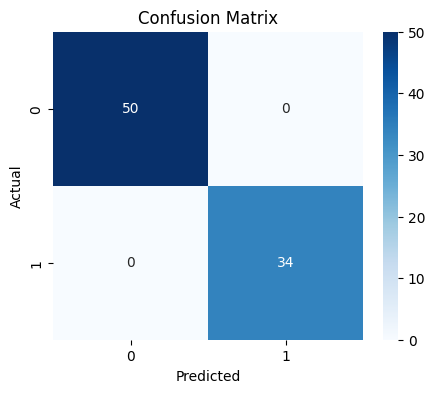

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = log_reg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# If you have not already split, (re)create split to ensure X_train/X_test are in memory:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_model.fit(X_train, y_train)
print("Model trained successfully!")


Model trained successfully!


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



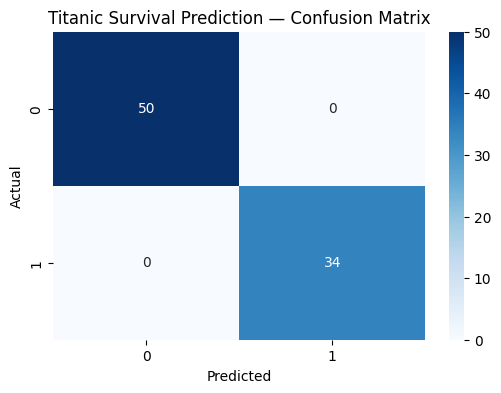

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = log_reg_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Titanic Survival Prediction — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(df.head(10))
print("\nColumns:", df.columns.tolist())

# Check if Survived is mistakenly included in X
print("\nDoes X contain Survived?", "Survived" in X.columns)

# Check for duplicates between X_train and X_test
dup = pd.merge(X_train.reset_index(), X_test.reset_index(), how='inner')
print("\nOverlapping rows between train and test:", dup.shape[0])

# Check class distribution
print("\nTarget distribution:")
print(df['Survived'].value_counts())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892         0       3    male  34.5      0      0   7.8292        Q
1          893         1       3  female  47.0      1      0   7.0000        S
2          894         0       2    male  62.0      0      0   9.6875        Q
3          895         0       3    male  27.0      0      0   8.6625        S
4          896         1       3  female  22.0      1      1  12.2875        S
5          897         0       3    male  14.0      0      0   9.2250        S
6          898         1       3  female  30.0      0      0   7.6292        Q
7          899         0       2    male  26.0      1      1  29.0000        S
8          900         1       3  female  18.0      0      0   7.2292        C
9          901         0       3    male  21.0      2      0  24.1500        S

Columns: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Does X contain Survived? False